4883.0
5598.0


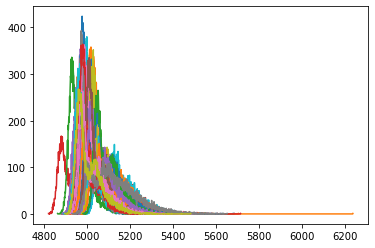

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

histogramCharge = []
histogramHisto = []

illuminated_pixel = pd.read_csv('Illuminated_pixels_charge_ped_first_post.csv')   #Dataframe contains the charge of all events in each illuminated pixel
len(np.histogram(illuminated_pixel.iloc[:,1],bins=100)[1])
print(min(illuminated_pixel.iloc[:,1]))
print(max(illuminated_pixel.iloc[:,1]))
for i in range(1,60):
    charge = np.histogram(illuminated_pixel.iloc[:,i],bins=range(int(min(illuminated_pixel.iloc[:,i])), int(max(illuminated_pixel.iloc[:,i]) + 1.), 1))[1]
    newcharge = []
    for j in range(len(charge)-1):
        newcharge.append((charge[j]+charge[j+1])/2.)
    newcharge = np.array(newcharge)
    histogramCharge.append(newcharge)
    histogramHisto.append(np.histogram(illuminated_pixel.iloc[:,i],bins=range(int(min(illuminated_pixel.iloc[:,i])), int(max(illuminated_pixel.iloc[:,i]) + 1), 1))[0])
    plt.plot(histogramCharge[-1],histogramHisto[-1])
#    np.histogram(illuminated_pixel.iloc[:,i],bins=100)[1]
#    histogramCharge.append(np.histogram(illuminated_pixel.iloc[:,i],bins=100))
#len(illuminated_pixel.iloc[:,400])
#sns.histplot(data=illuminated_pixel, x=441, bins=100, log_scale=False, kde='True', legend=True)
# plt.xlim(-250,500)
# To plot all pixels at once, intense is an array which contains all the illumnated pixels and is saved as
# Illuminated_pixels_charge_first_post.csv
#for g in intense[0]:
#    sns.histplot(data=illuminated_pixel, x=g, bins=1000, log_scale=False, kde='True', legend=True)
#    plt.xlim(-250,500)
#    plt.savefig(f'hist_{g}.png', )
#    plt.clf()

In [2]:
import NectarGAIN

In [3]:
#gain = NectarGAIN.NectarSPEGain()
#gain.FillDataHisto(histogramCharge[0],histogramHisto[0],histogramCharge[0],histogramHisto[0])
#gain.StartParameters()
#gain.fitSignalOnly()

pedestal mean  4953.052812722526  width  16
pedestal mean  4953.052812722526  width  16
<ValueView of Minuit at 5624201e0580>
  par_000_res: 0.5
  par_001_mu2: 50.0
  par_002_muped: 4953.052812722526
  par_003_sigped: 16.0
  par_004_lum: 1.0


<ipython-input-4-577e52c7cedb>:11: DeprecationWarning: Using keyword `forced_parameters` is deprecated. Use `name` instead
  result = gain.fitSignalOnly()
/home/caroff/CTA/StudySPEPooja/NectarGAIN.py:331: InitialParamWarning: errordef is not given, defaults to 1.
  m = Minuit(self.Chi2SignalFixedModel,**test, print_level=2)


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 238.9                      │       Ncalls = 542 (542 total)       │
│ EDM = 9.43e-05 (Goal: 0.0002)    │               up = 1.0               │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
<ValueView of Minuit at 5624201e0580>
  par_000_res: 0.4961074902775294
  par_001_mu2: 62.51453173944442
  par_002_muped: 4978.117262121825
  par_003_sigped: 16.21502788055045
  par_004_lum: 0.30010484078209193
<ErrorView of Minuit at 56242

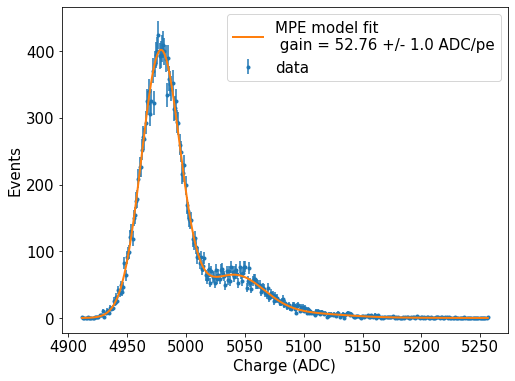

In [4]:
gainTable = []
gainUncertaintyTable = []
minuitValues = []
minuitErrors = []
#for i in range(len(histogramCharge)):
for i in range(30,31):
    if not (i==225):
        gain = NectarGAIN.NectarSPEGain()
        gain.FillDataHisto(histogramCharge[i],histogramHisto[i],histogramCharge[i],histogramHisto[i])
        gain.StartParameters()
        result = gain.fitSignalOnly()
        gainTable.append(result[0])
        gainUncertaintyTable.append(result[1])
        minuitValues.append(result[2])
        minuitErrors.append(result[3]) 
        plt.savefig('SPEFit_'+str(i)+'.pdf') 

In [5]:
Luminosity = []
for i in range(len(minuitValues)):
    Luminosity.append(minuitValues[i][4])


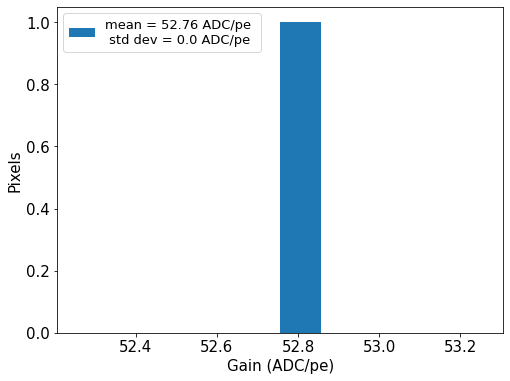

In [6]:
plt.figure(figsize=(8, 6))
plt.hist(gainTable,bins=10,label="mean = "+str(round(np.mean(gainTable),2))+" ADC/pe \n std dev = "+str(round(np.std(gainTable),2))+" ADC/pe")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Gain (ADC/pe)", size=15)
plt.ylabel("Pixels", size=15)
plt.legend(fontsize=13)
plt.savefig('distributionGain.pdf') 

No handles with labels found to put in legend.


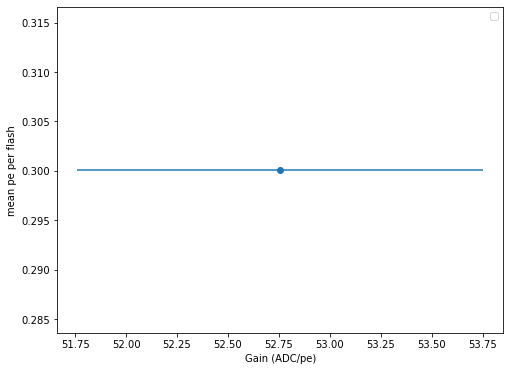

In [7]:
plt.figure(figsize=(8, 6))
plt.errorbar(gainTable,Luminosity,0,gainUncertaintyTable,fmt="o")
plt.ylabel("mean pe per flash")
plt.xlabel("Gain (ADC/pe)")

plt.legend()
plt.savefig('CorrelationGainLum.pdf') 

In [ ]:
len(gainTable)

In [ ]:
gainUncertaintyTable